In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates
from astropy.io import fits
import glob

#Path to top-level do-dem directory - edit for your system.
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')
import nustar_dem_prep as nu
import region_fitting as rf
import gauss2D as g2d

['/Users/jmdunca2/nustar/jul-2021/90710203001//event_cl/nu90710203001A06_cl.evt', '/Users/jmdunca2/nustar/jul-2021/90710203001//event_cl/nu90710203001B06_cl.evt']
Separation between double centers:  199.23147245602374
Separation between double centers:  204.188238535516
Region radius (generally non-overlapping):  99


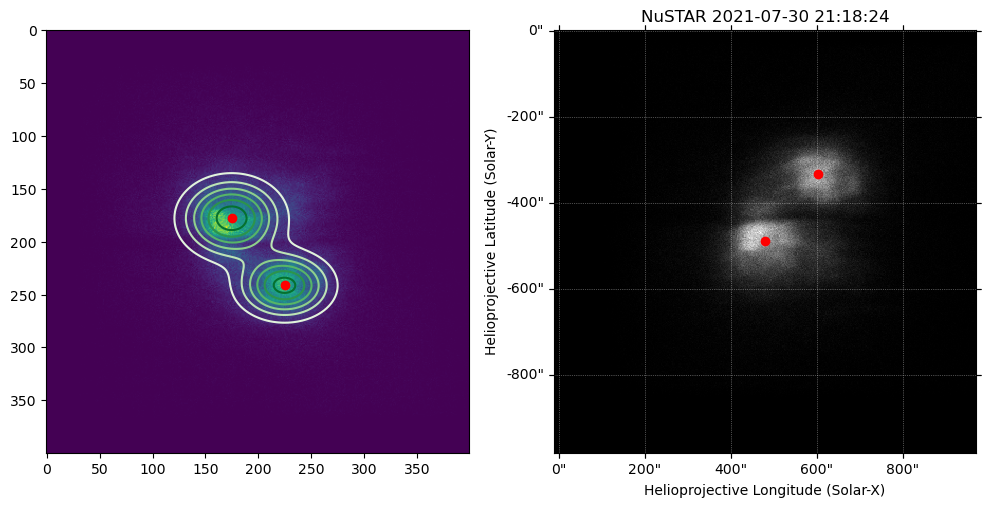

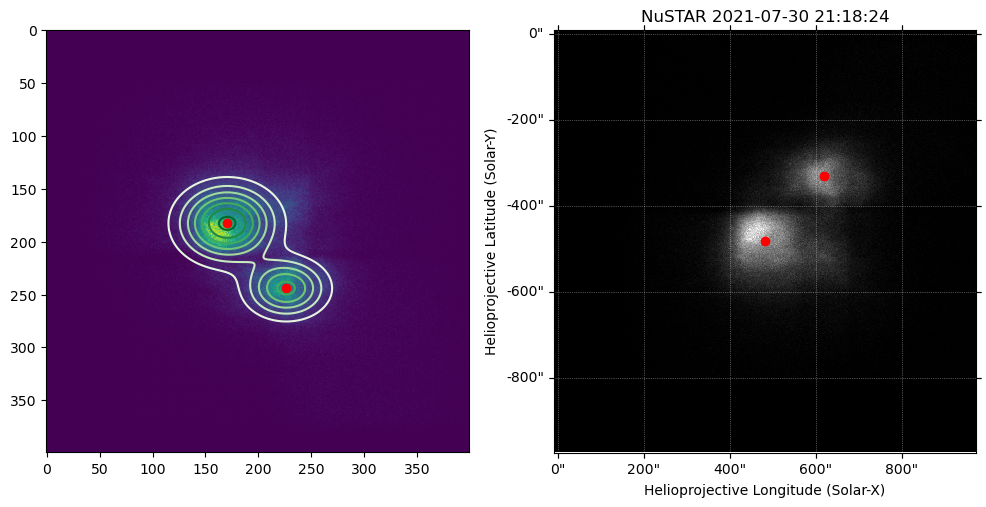

In [2]:
in_dir='/Users/jmdunca2/nustar/jul-2021/90710203001/'
file = glob.glob(in_dir+'/event_cl/nu*06_cl.evt')
print(file)
for f in file:
    nu.convert_wrapper(f)

sunfiles=glob.glob(in_dir+'/event_cl/nu*06_cl_sunpos.evt')

seps=[]
for s in sunfiles:
    #If you don't like your two gaussians, try again with the "guess" keyword – enter a coordinate around where
    #your missing gaussian should be – in pixel coorindates as shown on the left plot.
    res = g2d.nu_fit_gauss(s, twogaussians=True, boxsize=200, plot=True, plotmoments=False)#,guess=[200,300])
    params, worldcens, nustar_map, time0, time1 = res
    separation = g2d.abs_dif_cord(worldcens)
    print('Separation between double centers: ', separation)
    seps.append(separation)

region_radius = int(np.min(seps)/2)
print('Region radius (generally non-overlapping): ', region_radius)

#Are the two regions mostly north-south or east-west separated? If halfway between, either will work. Comment the other out. 
sep_axis = 'EW'
#sep_axis = 'NS'

#Did you need a guess for one of the centers to make it work? Set it here.
guess=[]

In [3]:
import importlib

importlib.reload(rf)

regfile='/Users/jmdunca2/do-dem/dodem/starter_region.reg'
nustar_path = '/Users/jmdunca2/do-dem/initial_dem_jul21/test_intervals/'

newregfile, percent = rf.get_file_region(sunfiles[0], time0, time1, regfile, nofit=False, 
                                                 radius=region_radius, working_dir=nustar_path,
                                                twogauss=True, direction='east', guess=[])

Doing two gaussian fitting, and selecting the center of the one to the  east
Percent of emission in region: 0.3340576538829919


NEXT STEP: test doing the below for both halves of the double center region over a whole orbit, and see how it goes!

Separation between double centers:  199.23147245602374
Separation between double centers:  204.188238535516
Region radius (generally non-overlapping):  99


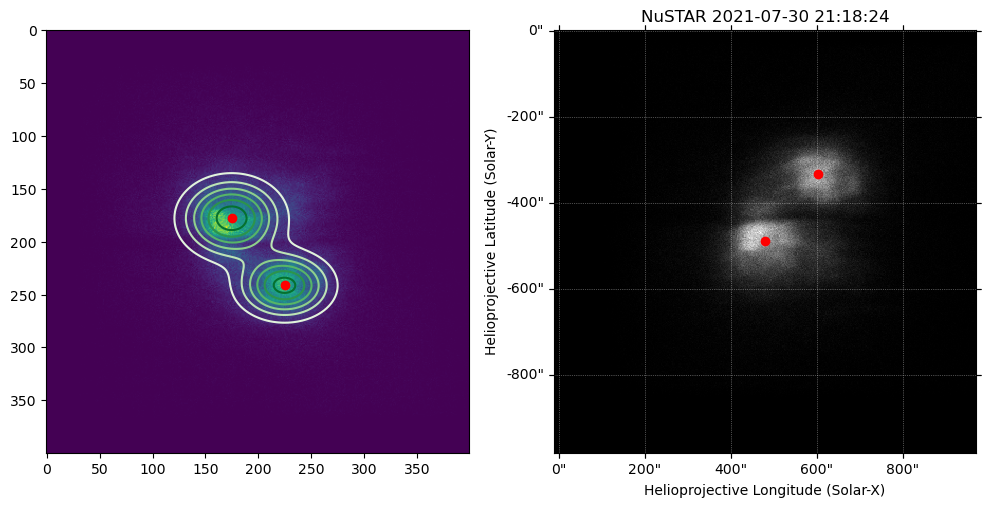

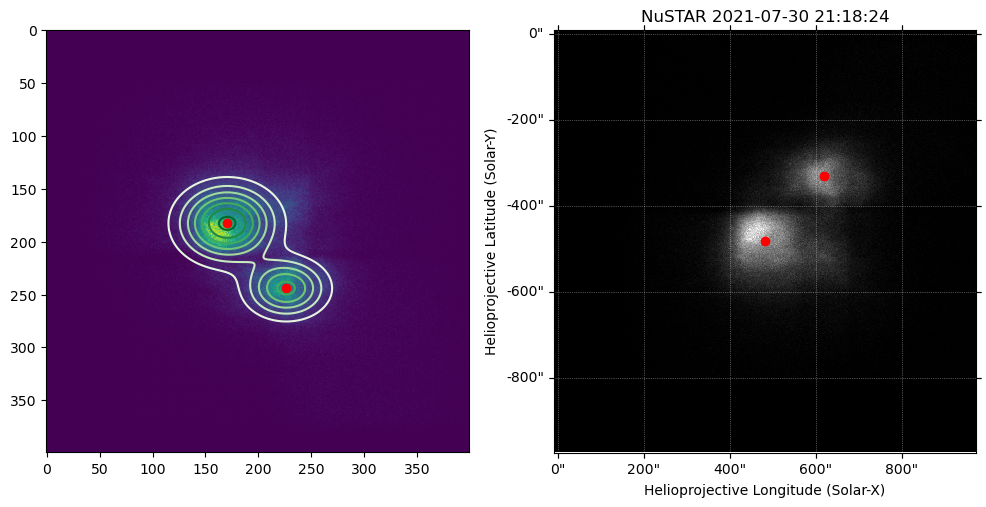

In [4]:
in_dir=in_dir
files = glob.glob(in_dir+'/event_cl/nu*06_cl.evt')
for f in files:
    nu.convert_wrapper(f)

sunfiles=glob.glob(in_dir+'/event_cl/nu*06_cl_sunpos.evt')

seps=[]
for s in sunfiles:
    #If you don't like your two gaussians, try again with the "guess" keyword – enter a coordinate around where
    #your missing gaussian should be – in pixel coorindates as shown on the left plot.
    res = g2d.nu_fit_gauss(s, twogaussians=True, boxsize=200, plot=True, plotmoments=False)#,guess=[200,300])
    params, worldcens, nustar_map, time0, time1 = res
    separation = g2d.abs_dif_cord(worldcens)
    print('Separation between double centers: ', separation)
    seps.append(separation)

region_radius = int(np.min(seps)/2)
print('Region radius (generally non-overlapping): ', region_radius)

#Are the two regions mostly north-south or east-west separated? If halfway between, either will work. Comment the other out. 
sep_axis = 'EW'
#sep_axis = 'NS'

#Did you need a guess for one of the centers to make it work? Set it here.
guess=[]

In [11]:
#Make a function from the below

def two_source_tis(timerange, in_dir, working_base, region_radius, sep_axis,
                  guess=[], erange=[6.,10]):

    import pathlib
    import orbit_auto as oa

    if sep_axis=='EW':
        directions = ['east', 'west']
    elif sep_axis=='NS':
        directions = ['north', 'south']
    else:
        print('Axis entered: ', sep_axis)
        print("Please chose either east/west ('EW') or north/south ('NS') orientation for your two regions!")
        return

    for dir in directions:
        working_dir=working_base+dir+'/'
        save_path = pathlib.Path(working_dir)
        if not save_path.exists():
            save_path.mkdir()
        bad_suborbits, all_intervals = oa.get_suborbit_intervals(timerange, in_dir, working_dir, erange=erange, 
                                                         force_both_fpm_always=True, shush=True,
                                                     twogauss=True, direction=dir, guess=guess, 
                                                     nuradius=region_radius,
                                                     nofit=False, fast_min_factor=3)
        
timerange=[[time0,time1]]  
working_base='/Users/jmdunca2/do-dem/initial_dem_jul21/'
two_source_tis(timerange, in_dir, working_base, region_radius, sep_axis)


Fast Method Counts:  30.0
2021-07-30 21:18:20+00:00
2021-07-30 21:39:15+00:00
Using grades 0-4 NuSTAR events.

Max NuSTAR Energy:  31.68000030517578
Highest energy range: [6.0, 10]
Total Above:  4
Above Energies:  [10.27999973 20.15999985 26.36000061 31.68000031]
ATC: 1.0

Using grades 0-4 NuSTAR events.

Max NuSTAR Energy:  25.760000228881836
Highest energy range: [6.0, 10]
Total Above:  1
Above Energies:  [25.76000023]
ATC: 1.0

Not enough counts.

Not Enough counts in:  21-18-20 21-39-15
Counts:  2.0
Starting over with requirement for twice the counts in fast interval

Fast Method Counts:  60.0
2021-07-30 21:18:20+00:00
2021-07-30 21:56:40+00:00
Using grades 0-4 NuSTAR events.

Max NuSTAR Energy:  35.63999938964844
Highest energy range: [6.0, 10]
Total Above:  7
Above Energies:  [10.27999973 21.87999916 23.95999908 26.36000061 31.23999977 31.68000031
 35.63999939]
ATC: 2.0

Using grades 0-4 NuSTAR events.

Max NuSTAR Energy:  35.07999801635742
Highest energy range: [6.0, 10]
Total 

In [6]:
import pathlib
import orbit_auto as oa

timerange=[[time0,time1]]
working_dir='/Users/jmdunca2/do-dem/initial_dem_jul21/east/'
save_path = pathlib.Path(working_dir)
if not save_path.exists():
    save_path.mkdir()

bad_suborbits, all_intervals = oa.get_suborbit_intervals(timerange, in_dir, working_dir, erange=[6.,10], 
                                                             force_both_fpm_always=True, shush=True,
                                                         twogauss=True, direction='east', guess=[], 
                                                         nuradius=region_radius,
                                                         nofit=False, fast_min_factor=3)

working_dir='/Users/jmdunca2/do-dem/initial_dem_jul21/west/'
save_path = pathlib.Path(working_dir)
if not save_path.exists():
    save_path.mkdir()

bad_suborbits, all_intervals = oa.get_suborbit_intervals(timerange, in_dir, working_dir, erange=[6.,10], 
                                                             force_both_fpm_always=True, shush=True,
                                                         twogauss=True, direction='west', guess=[], 
                                                         nuradius=region_radius,
                                                         nofit=False,fast_min_factor=3)



Fast Method Counts:  30.0
2021-07-30 21:18:20+00:00
2021-07-30 21:39:15+00:00
Using grades 0-4 NuSTAR events.
Now we will make some spectral data products.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
100% [............................................................................] 484820 / 484820Doing two gaussian fitting, and selecting the center of the one to the  east
Percent of emission in region: 0.3887019642861712
ARF File:  ['/Users/jmdunca2/do-dem/initial_dem_jul21/east/21-18-20_21-39-15/nu90710203001A06_0_4_p_sr.arf']
RMF File:  ['/Users/jmdunca2/do-dem/initial_dem_jul21/east/21-18-20_21-39-15/nu90710203001A06_0_4_p_sr.rmf']
PHA File:  ['/Users/jmdunca2/do-dem/initial_dem_jul21/east/21-18-20_21-39-15/nu90710203001A06_0_4_p_sr.pha']
ARF File:  ['/Users/jmdunca2/do-dem/initial_dem_jul21/east/21-18-20_21-39-15/nu90710203001A06_21_24_p_sr.arf']
RMF File:  ['/Users/jmdunca2/do-dem/initial_dem_jul21

In [ ]:
bad_suborbits, all_intervals = oa.get_suborbit_intervals(timerange, in_dir, working_dir, erange=[6.,10], 
                                                             force_both_fpm_always=True, shush=True,
                                                         twogauss=True, direction='east', guess=[])



In [376]:
#file='/Users/jmdunca2/nustar/may-2018/80410201001/event_cl/nu80410201001A06_cl_sunpos.evt'
file='/Users/jmdunca2/nustar/jul-2021/90710203001/event_cl/nu90710203001A06_cl_sunpos.evt'
#file='/Users/jmdunca2/nustar/jul-2024/21012005001/event_cl/nu21012005001A06_cl.evt'

#file='/Users/jmdunca2/nustar/jul-2021/80710201001/event_cl/nu80710201001A06_cl.evt'

#nu.convert_wrapper(file)

#file='/Users/jmdunca2/nustar/jul-2024/21012008001/event_cl/nu21012008001A06_cl_sunpos.evt'
#file='/Users/jmdunca2/nustar/jul-2021/80710201001/event_cl/nu80710201001A06_cl_sunpos.evt'

with fits.open(file) as hdu:
    evt_data = hdu[1].data
    hdr = hdu[1].header

nustar_map = nustar.map.make_sunpy(evt_data, hdr)

[1322, 1719]
(218.0, 200.23923698289153, 199.8792490788914, 45.68119050975972, 46.099984344534064)
[136.8 177.8 174.8  21.8  27.6 129.2 241.4 225.   18.2  26. ]


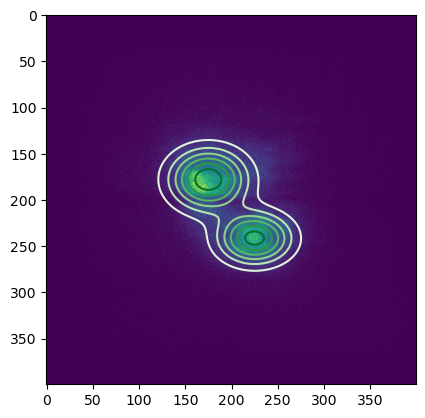

In [377]:
nudata=nustar_map.data

#maxcoords=np.where(nudata == np.max(nudata))
#print(maxcoords)

m = moments(nudata)
cencoords=[round(m[1]),round(m[2])]

coords=cencoords
print(coords)

boxsize=200
xbox = [coords[1]-boxsize, coords[1]+boxsize]
ybox = [coords[0]-boxsize, coords[0]+boxsize]

boxdata = nudata[ybox[0]:ybox[1], xbox[0]:xbox[1]]
plt.imshow(boxdata)

m = moments(boxdata)
print(m)
mmt=gaussian(*m)

#params = fitgaussian(boxdata, twogaussians=False)
#fit = gaussian(*params)

params = fitgaussian(boxdata, twogaussians=True)#, guess=[250,325])
print(params.round(1))
fit = two_gaussians(*params)


ss=boxdata.shape
xs=np.arange(0, ss[0], 1)
ys=np.arange(0, ss[1], 1)


#plt.scatter(cens[0], cens[1], color='purple')
plt.contour(xs, ys, fit(*np.indices(boxdata.shape)), cmap=plt.cm.Greens)
#plt.contour(xs, ys, mmt(*np.indices(boxdata.shape)), cmap=plt.cm.Reds)

In [ ]:
region=make_region(aia_regiondict, mm)
og_region = region.to_pixel(mm.wcs)                    
og_region.plot(axes=ax, color='pink', ls='--', lw=3, label='Chosen AIA Region')

In [95]:
(np.random.rand()*2-1)

-0.23455691787817723

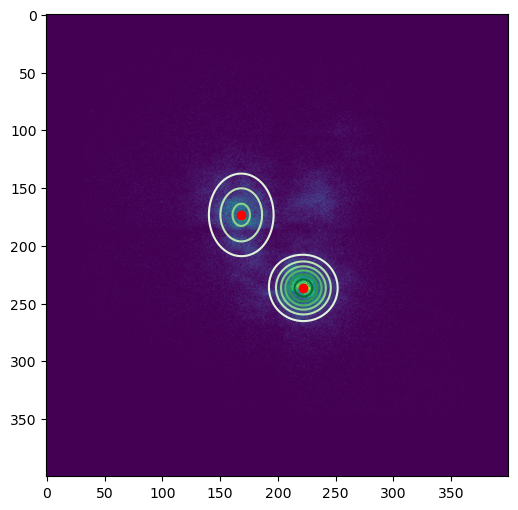

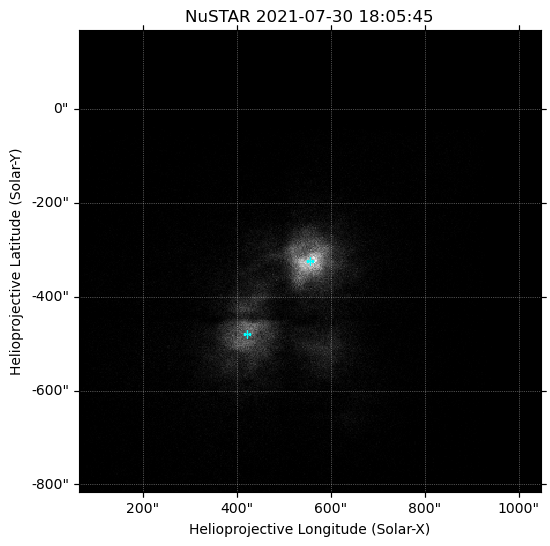

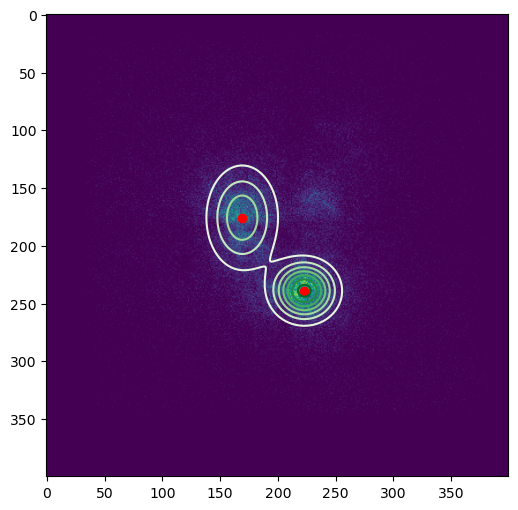

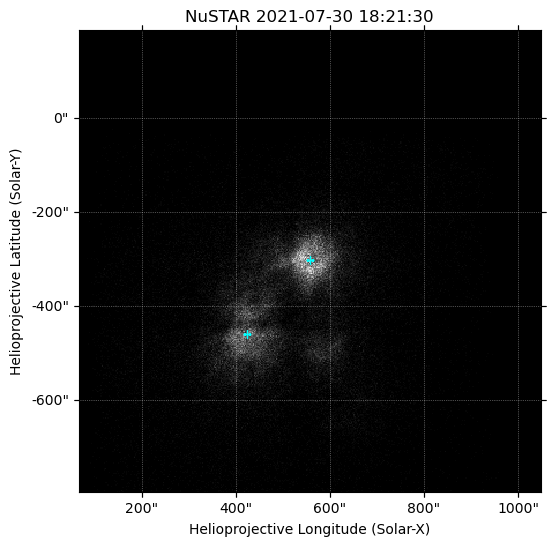

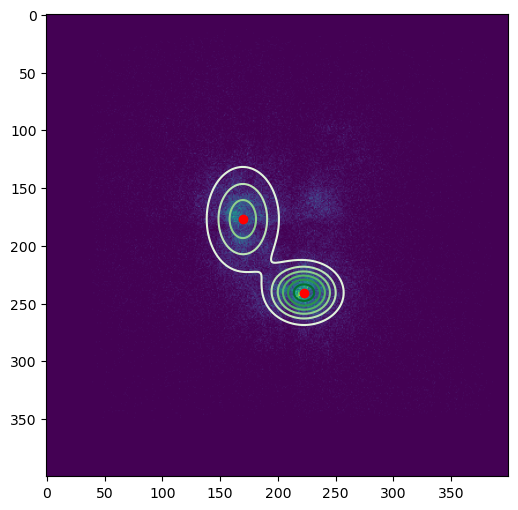

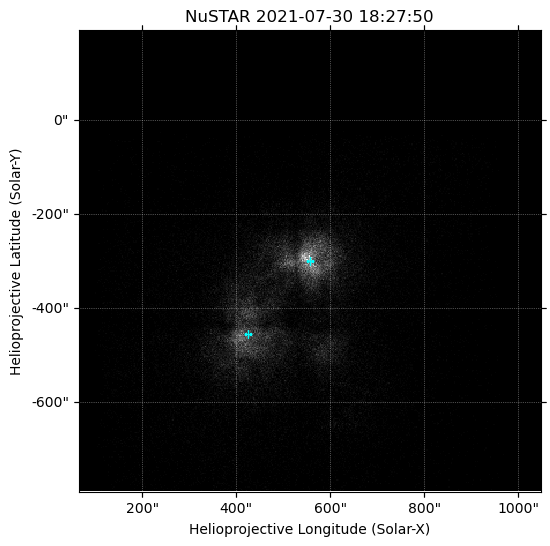

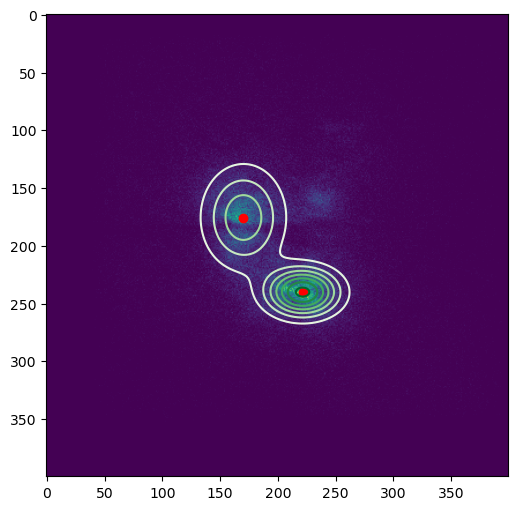

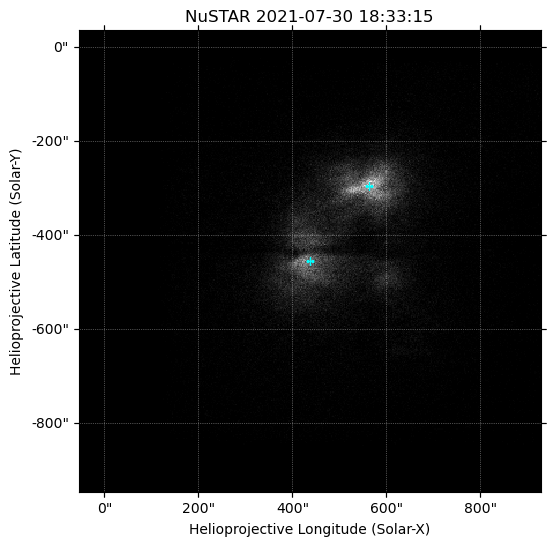

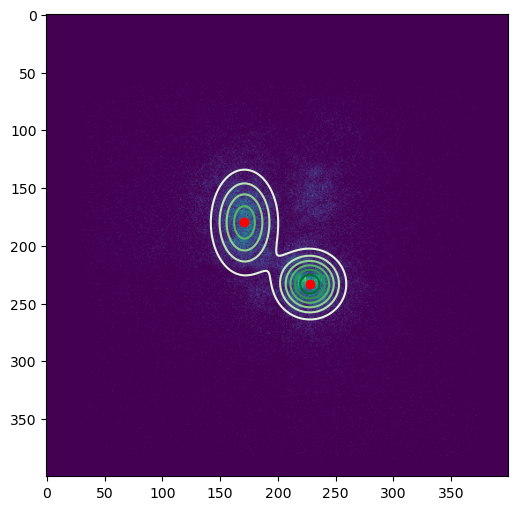

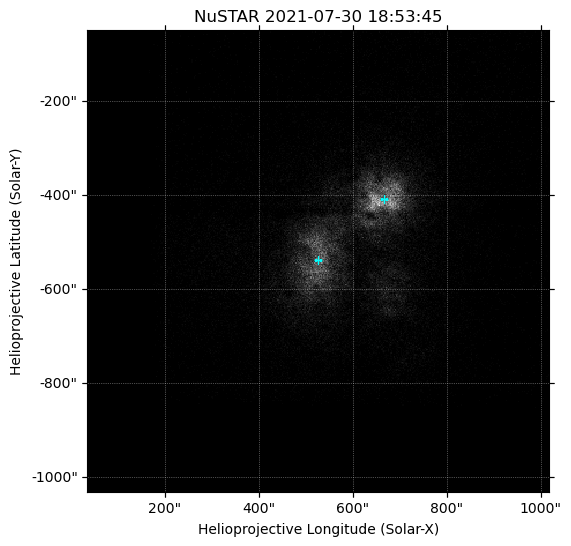

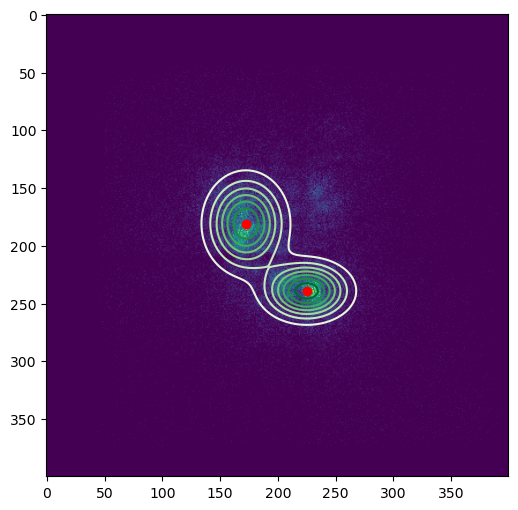

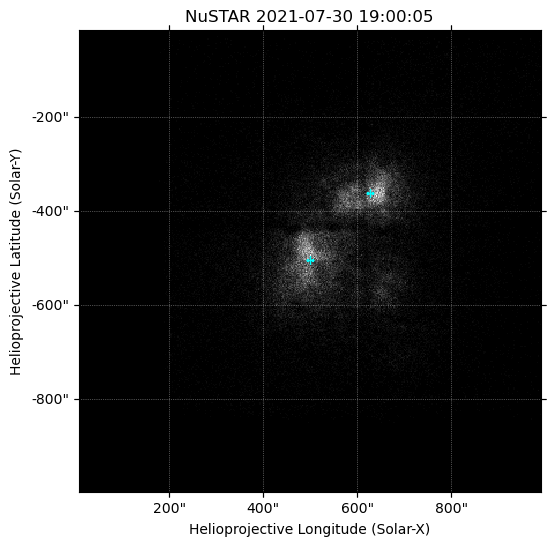

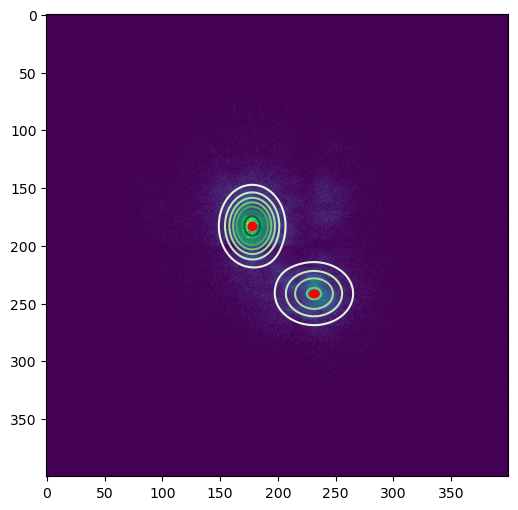

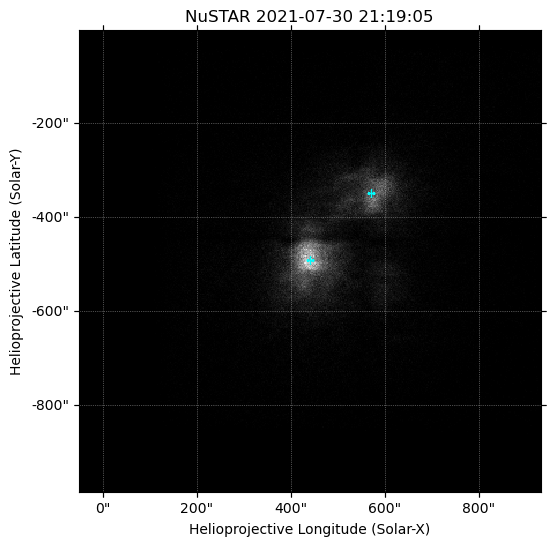

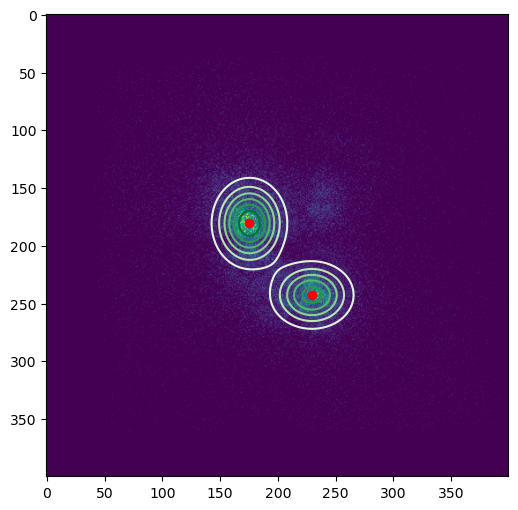

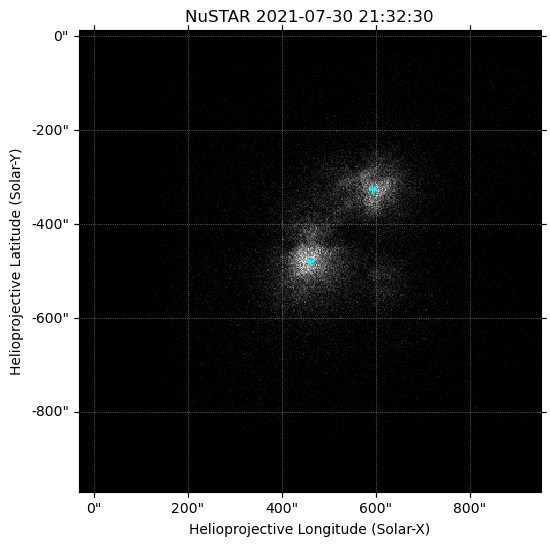

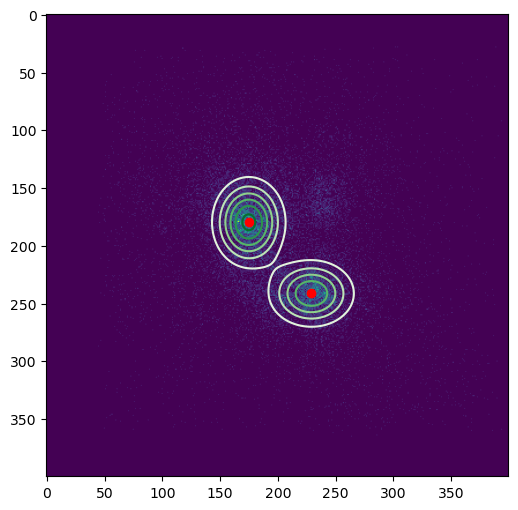

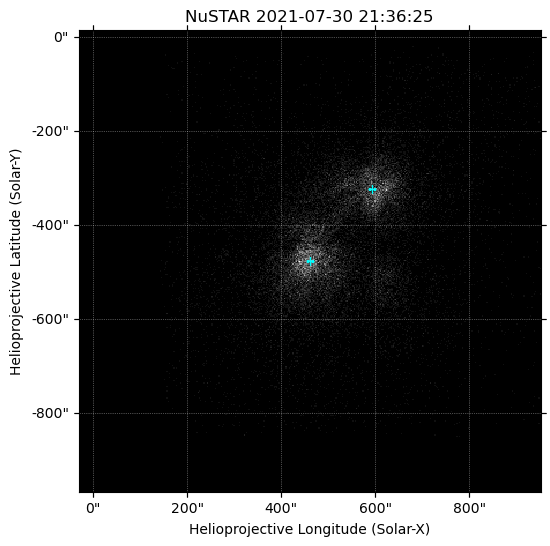

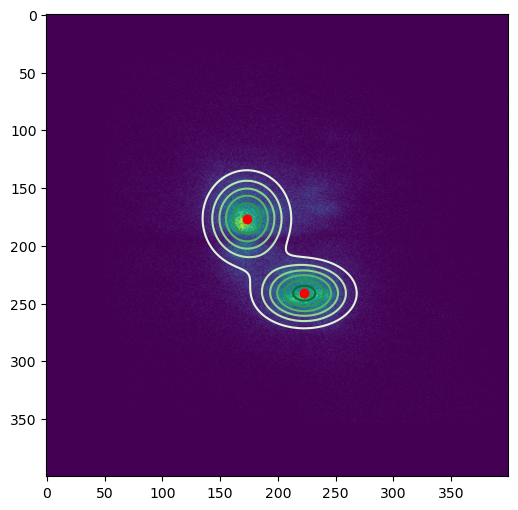

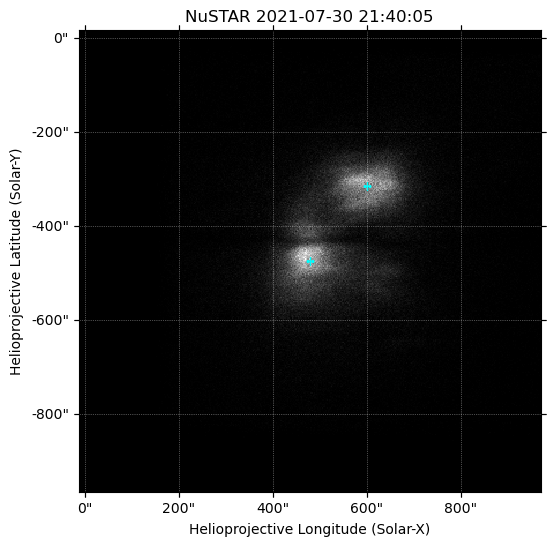

In [371]:
import glob
folders = glob.glob('/Users/jmdunca2/do-dem/initial_dem_jul21/test_intervals/*')
folders.sort()

paramsA=[]
paramsB=[]
mapsA=[]
mapsB=[]
censA=[]
censB=[]
times=[]
for f in folders:
    sunpos = glob.glob(f+'/*_sunpos.evt')
    sunpos.sort()
    #print(sunpos)
    pA = nu_fit_gauss(sunpos[0], twogaussians=True, boxsize=200, plot=True, plotmoments=False)
    pB = nu_fit_gauss(sunpos[1], twogaussians=True, boxsize=200, plot=False, plotmoments=False)
    paramsA.append(pA[0])
    paramsB.append(pB[0])
    censA.append(pA[1])
    censB.append(pB[1])
    mapsA.append(pA[2])
    mapsB.append(pB[2])
    times.append(pA[3])

times.append(pA[4])

[204.279196219445, 204.3097756427107, 203.80755974992576, 202.8950691256385, 191.27838770368663, 192.9880361124359, 195.21769657259654, 202.5590382196066, 201.80999318291805, 200.40085984880355]
[209.94658351073653, 221.96265177871155, 222.56023818523812, 217.93684339233525, 191.12914409316062, 202.31590225916395, 208.2278781523801, 213.02896161989688, 211.01720731756737, 205.5311458437327]
95


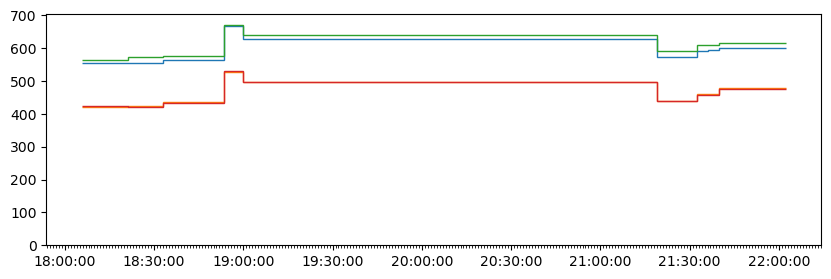

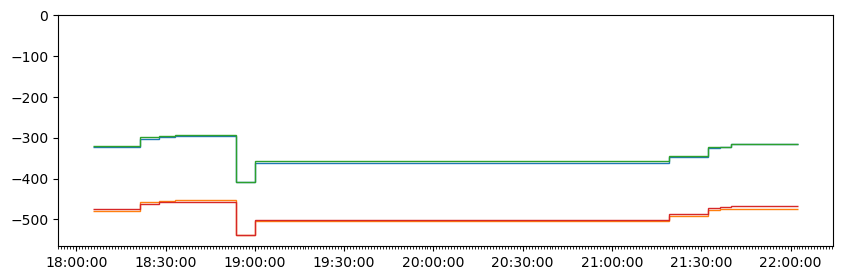

In [383]:
xsA1 = [ cord[0].Tx.value for cord in censA]
xsA2 = [ cord[1].Tx.value for cord in censA]
xsAb_ = np.where(np.array(xsA1) > np.array(xsA2), np.array(xsA1), np.array(xsA2))
xsAs_ = np.where(np.array(xsA1) < np.array(xsA2), np.array(xsA1), np.array(xsA2))

xsA1 = [ cord[0].Tx.value for cord in censB]
xsA2 = [ cord[1].Tx.value for cord in censB]
xsBb_ = np.where(np.array(xsA1) > np.array(xsA2), np.array(xsA1), np.array(xsA2))
xsBs_ = np.where(np.array(xsA1) < np.array(xsA2), np.array(xsA1), np.array(xsA2))

def abs_dif_cord(cord):
    return ((cord[0].Tx.value-cord[1].Tx.value)**2 + (cord[0].Ty.value-cord[1].Ty.value)**2)**(1/2)

abs_dif_a = [abs_dif_cord(cord) for cord in censA]
abs_dif_b = [abs_dif_cord(cord) for cord in censB]

print(abs_dif_a)
print(abs_dif_b)
ok_sep = int(np.min([abs_dif_a, abs_dif_b])/2)
print(ok_sep)

    
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1,1,1)

ts = [t.datetime for t in times]

# plt.plot(ts, xsAb_, label='FPMA 1')
# plt.plot(ts, xsAs_, label='FPMA 2')
# plt.plot(ts, xsBb_, label='FPMB 1')
# plt.plot(ts, xsBs_, label='FPMB 2')


ax.stairs(xsAb_, ts, label='FPMA 1', baseline=None)
ax.stairs(xsAs_, ts, label='FPMA 2', baseline=None)
ax.stairs(xsBb_, ts, label='FPMB 1', baseline=None)
ax.stairs(xsBs_, ts, label='FPMB 2', baseline=None)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=1))


ysA1 = [ cord[0].Ty.value for cord in censA]
ysA2 = [ cord[1].Ty.value for cord in censA]
ysAb_ = np.where(np.array(ysA1) > np.array(ysA2), np.array(ysA1), np.array(ysA2))
ysAs_ = np.where(np.array(ysA1) < np.array(ysA2), np.array(ysA1), np.array(ysA2))

ysA1 = [ cord[0].Ty.value for cord in censB]
ysA2 = [ cord[1].Ty.value for cord in censB]
ysBb_ = np.where(np.array(ysA1) > np.array(ysA2), np.array(ysA1), np.array(ysA2))
ysBs_ = np.where(np.array(ysA1) < np.array(ysA2), np.array(ysA1), np.array(ysA2))

fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1,1,1)
ax.stairs(ysAb_, ts, label='FPMA 1', baseline=None)
ax.stairs(ysAs_, ts, label='FPMA 2', baseline=None)
ax.stairs(ysBb_, ts, label='FPMB 1', baseline=None)
ax.stairs(ysBs_, ts, label='FPMB 2', baseline=None)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=1))

In [356]:
ts = [t.datetime for t in times]

In [357]:
ts

[datetime.datetime(2021, 7, 30, 18, 5, 40),
 datetime.datetime(2021, 7, 30, 18, 21, 25),
 datetime.datetime(2021, 7, 30, 18, 27, 44, 999999),
 datetime.datetime(2021, 7, 30, 18, 33, 10),
 datetime.datetime(2021, 7, 30, 18, 53, 40),
 datetime.datetime(2021, 7, 30, 19, 0),
 datetime.datetime(2021, 7, 30, 21, 19),
 datetime.datetime(2021, 7, 30, 21, 32, 25),
 datetime.datetime(2021, 7, 30, 21, 36, 20),
 datetime.datetime(2021, 7, 30, 21, 40)]

In [336]:
xsAb_ = np.where(np.array(xsA1) > np.array(xsA2), np.array(xsA1), np.array(xsA2))
xsAs_ = np.where(np.array(xsA1) < np.array(xsA2), np.array(xsA1), np.array(xsA2))
xsAs_

array([422.16855489, 424.2168931 , 425.50269445, 436.6303699 ,
       527.38317807, 498.57051312, 440.48136872, 459.23888002,
       460.36304324, 478.4974368 ])

In [335]:
np.array(xsA1)

array([554.54714681, 556.61263357, 555.88688243, 436.6303699 ,
       527.38317807, 498.57051312, 440.48136872, 459.23888002,
       460.36304324, 478.4974368 ])

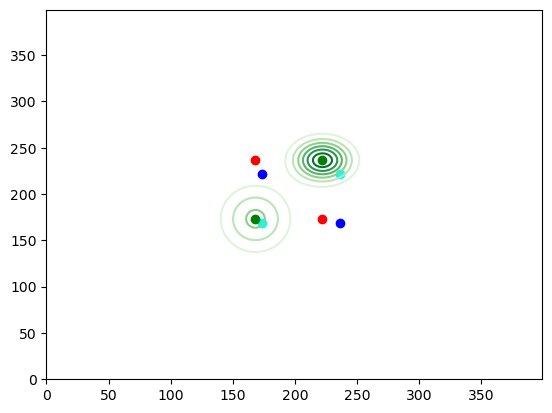

In [303]:
fitt = two_gaussians(*paramsA[0][0])

#plt.imshow(paramsA[0][-1])

ss=paramsA[0][-1].shape
xs=np.arange(0, ss[0], 1)
ys=np.arange(0, ss[1], 1)



plt.contour(xs, ys, fitt(*np.indices(paramsA[0][-1].shape)), cmap=plt.cm.Greens)
plt.scatter([paramsA[0][0][6], paramsA[0][0][1]], [paramsA[0][0][7], paramsA[0][0][2]], color='Cyan')
plt.scatter([paramsA[0][0][6], paramsA[0][0][1]], [paramsA[0][0][2], paramsA[0][0][7]], color='Blue')
plt.scatter([paramsA[0][0][2], paramsA[0][0][7]], [paramsA[0][0][6], paramsA[0][0][1]], color='Red')

#It turns out that the params y values must be used as the plt.scatter x values to agree with a contour plot.  

plt.scatter([paramsA[0][0][2], paramsA[0][0][7]], [paramsA[0][0][1], paramsA[0][0][6]], color='Green')

In [291]:
paramsA[0][0]

array([ 68.27723753, 236.46397293, 222.09978134,  14.61829054,
        15.09845768,  32.69049414, 173.17020401, 168.24560854,
        23.20642583,  18.19134758])

In [281]:
two_gaussians(*paramsA[0][0])

<function __main__.two_gaussians.<locals>.<lambda>(x, y)>